## Studi Kasus

Analisis Data Pelanggan Berdasarkan Karakteristik Demografi dan Pola Pengeluaran Pusat Perbelanjaan 

### Informasi Dataset

In [42]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

data = pd.read_csv('data.csv')

data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 📊 Melihat Informasi Struktur Dataset

Menampilkan tipe data, jumlah kolom, jumlah data, dan non-null entries untuk memastikan kelengkapan data.


In [43]:
# Melihat informasi struktur dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### 📊 Melihat Statistik Deskriptif

Menampilkan nilai deskriptif statistik seperti mean, min, max, standard deviation untuk seluruh variabel numerik.


In [44]:
# Melihat statistik deskriptif
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### 📊 Cek Missing Value

Memeriksa apakah terdapat data kosong atau missing value pada setiap kolom dataset.


In [45]:
print(f"Data Tubes : {data}")

Data Tubes :      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


### 📈 Visualisasi Distribusi Gender

Visualisasi jumlah pelanggan berdasarkan jenis kelamin menggunakan diagram batang (*countplot*).


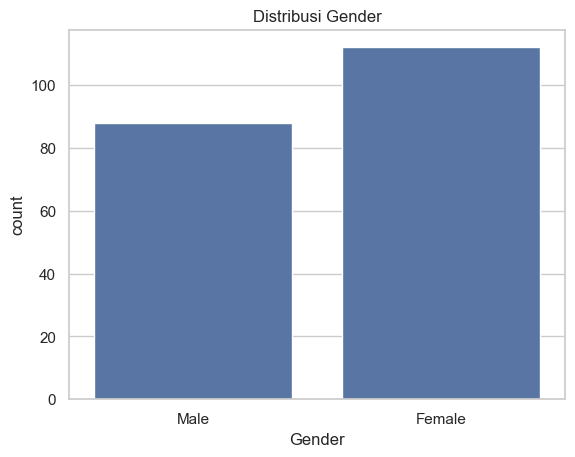

In [46]:
# Visualisasi distribusi Gender
sns.countplot(x='Gender', data=data)
plt.title('Distribusi Gender')
plt.show()


### 📈 Visualisasi Distribusi Usia

Visualisasi distribusi usia pelanggan menggunakan histogram untuk melihat sebaran umur dalam dataset.


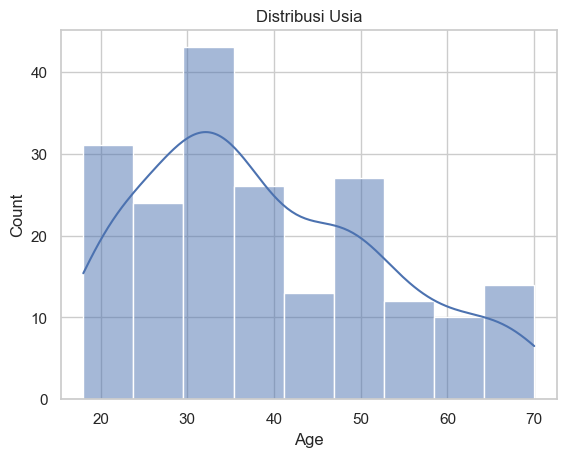

In [47]:
# Visualisasi distribusi Age
sns.histplot(data['Age'], kde=True)
plt.title('Distribusi Usia')
plt.show()


### 📈 Visualisasi Distribusi Pendapatan Tahunan

Visualisasi distribusi pendapatan tahunan pelanggan menggunakan histogram untuk melihat pola persebaran pendapatan.


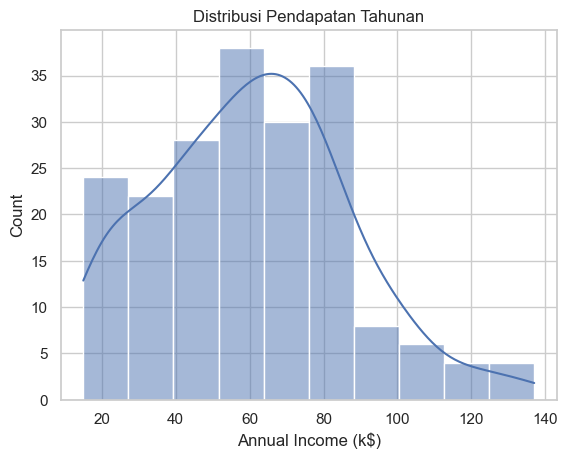

In [48]:
# Visualisasi distribusi Annual Income
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribusi Pendapatan Tahunan')
plt.show()


### 📈 Scatterplot Annual Income vs Spending Score

Visualisasi hubungan antara pendapatan tahunan pelanggan dengan *spending score*-nya menggunakan scatterplot, dengan warna berbeda berdasarkan jenis kelamin.


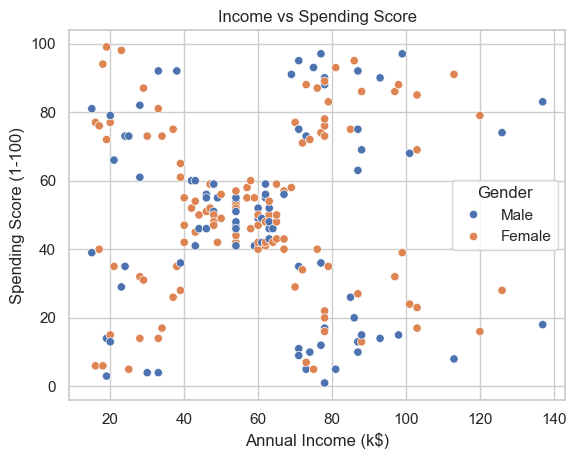

In [49]:
# Scatterplot Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender')
plt.title('Income vs Spending Score')
plt.show()


### Visualilasi Menggunakan Boxplot

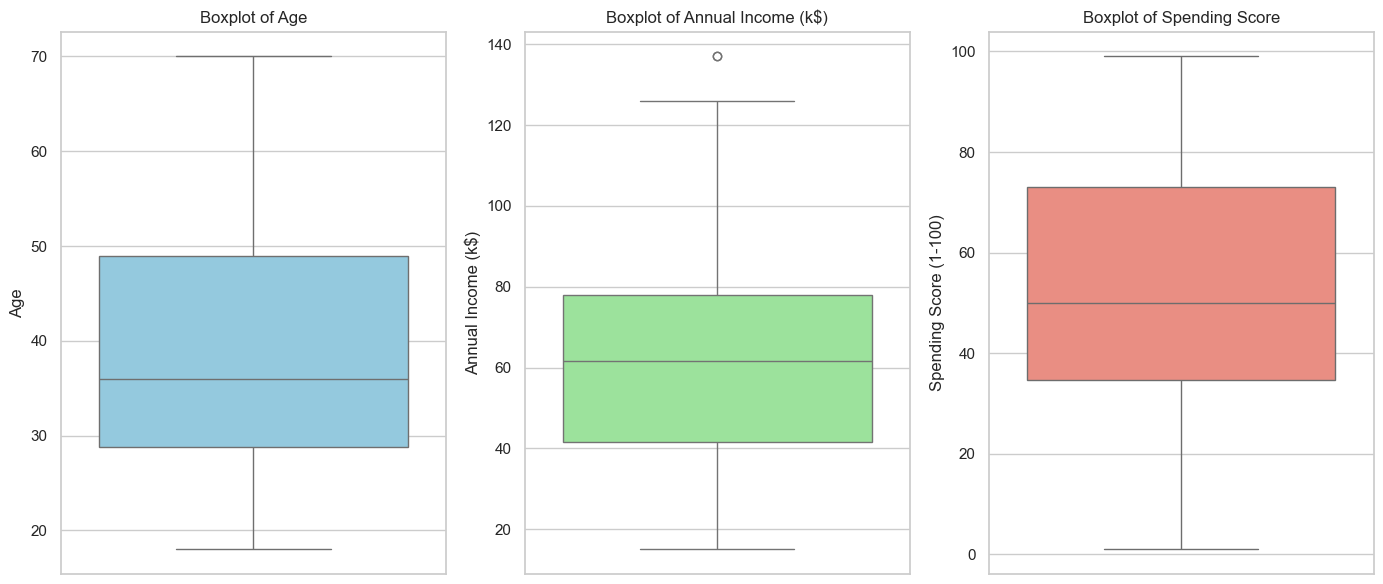

In [50]:

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Boxplot Age
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'], color='skyblue')
plt.title('Boxplot of Age')

# Boxplot Annual Income
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual Income (k$)'], color='lightgreen')
plt.title('Boxplot of Annual Income (k$)')

# Boxplot Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending Score (1-100)'], color='salmon')
plt.title('Boxplot of Spending Score')

plt.tight_layout()
plt.show()


### Visualisasi menggunakan Histogram

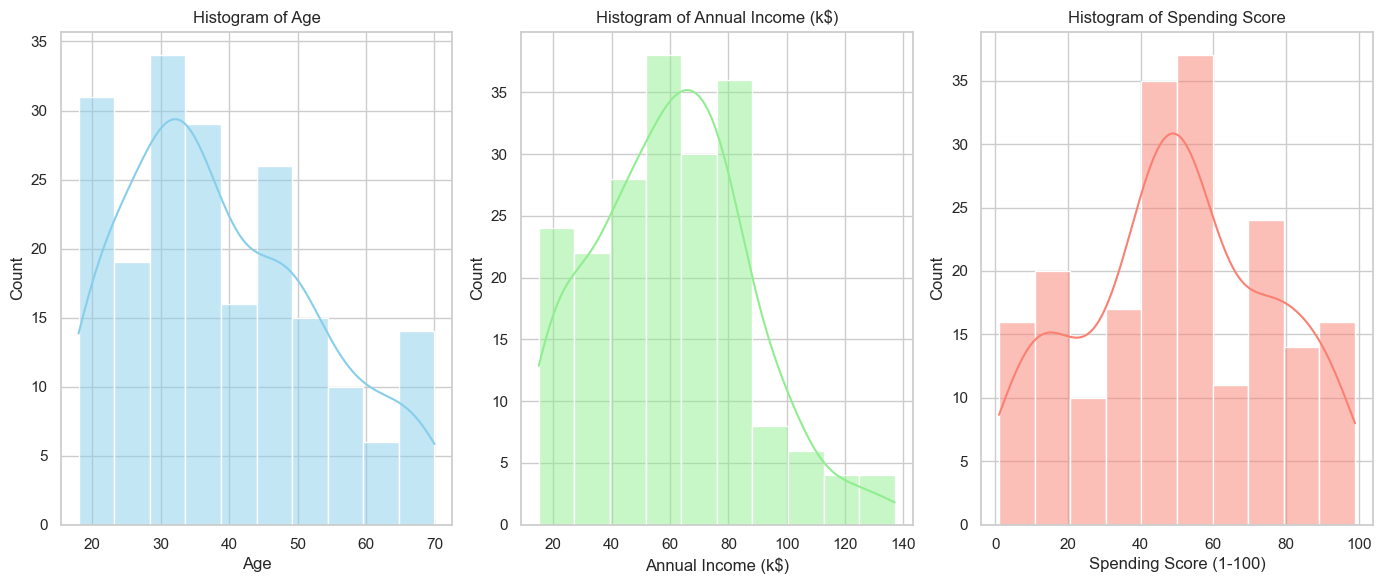

In [51]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Age')

# Histogram Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=10, kde=True, color='lightgreen')
plt.title('Histogram of Annual Income (k$)')

# Histogram Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True, color='salmon')
plt.title('Histogram of Spending Score')

plt.tight_layout()
plt.show()


### Data Preparation

In [52]:
# Cek baris duplikat
data.duplicated()

# Jumlah baris duplikat
data.duplicated().sum()

# Hapus baris duplikat
data = data.drop_duplicates()

In [53]:
# Hilangkan spasi, ubah ke huruf kecil untuk konsistensi
data['Gender'] = data['Gender'].str.strip().str.lower()

# Lihat nilai unik setelah normalisasi
data['Gender'].unique()


array(['male', 'female'], dtype=object)

In [54]:
# Menampilkan jumlah nilai kosong per kolom
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
data = data.drop(columns=['CustomerID'])  # kolom ID tidak berguna untuk clustering

 Hapus Kolom Tidak Relevan

In [56]:
#mengisi nilai kosong (contoh: dengan median untuk numerik)
data = data.fillna(data.median(numeric_only=True))

Data Reduction

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ambil hanya kolom numerik
numerical_cols = data.select_dtypes(include=['int64', 'float64'])

# Standardisasi data (wajib sebelum PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

# Terapkan PCA dan pilih jumlah komponen
pca = PCA(n_components=2)  # Ubah angka sesuai kebutuhan
pca_result = pca.fit_transform(scaled_data)

# Ubah hasil menjadi DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

print("Explained Variance Ratio per Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio per Component:
[0.44266167 0.33308378]


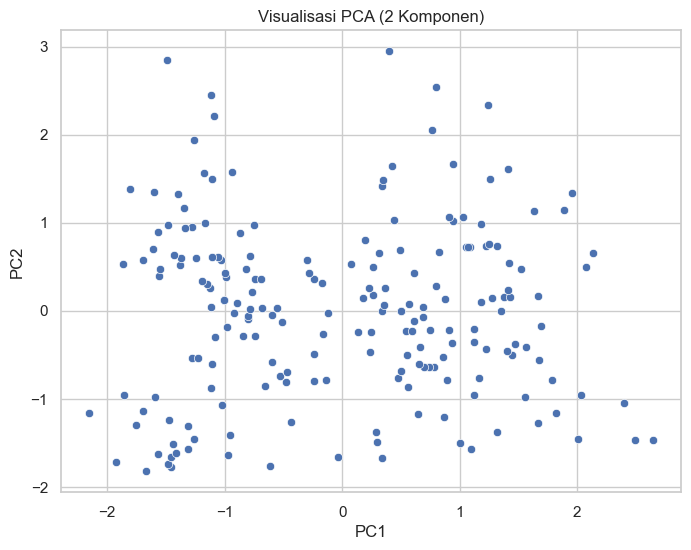

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('Visualisasi PCA (2 Komponen)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Data Transformation

In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Gender']])

# Konversi hasil encoding ke DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender']))

# Gabungkan ke dataset asli
data = data.drop(columns=['Gender'])
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)


print(encoded_df)


     Gender_female  Gender_male
0              0.0          1.0
1              0.0          1.0
2              1.0          0.0
3              1.0          0.0
4              1.0          0.0
..             ...          ...
195            1.0          0.0
196            1.0          0.0
197            0.0          1.0
198            0.0          1.0
199            0.0          1.0

[200 rows x 2 columns]


StandardScaler (Standarisasi Skala Data Numerik)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

### Data Modelling

Lihat nama kolom

In [61]:
print(data.columns.tolist())

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_female', 'Gender_male']


Buat kolom target: HighSpender

In [62]:
data['HighSpender'] = (data['Spending Score (1-100)'] >= 50).astype(int)

Pilih fitur (pakai salah satu gender column, tidak dua-duanya)

In [63]:
X = data[['Age', 'Annual Income (k$)', 'Gender_male']]
y = data['HighSpender']

Split data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Supervised Learnig

Latih model

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
import joblib
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']

Prediksi dan evaluasi

In [67]:
y_pred = model.predict(X_test)

Confusion matrix

In [68]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Confusion Matrix ===
[[12  8]
 [ 5 15]]


Akurasi

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

Akurasi Model: 0.68


#### Unsupervised Learning

Pilih fitur untuk clustering

In [70]:
X_cluster = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Buat model KMeans

In [71]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster)

In [72]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_cluster, data['Cluster'])

print(f"\n=== Silhouette Score ===")
print(f"Rata-rata Silhouette Score untuk {kmeans.n_clusters} klaster adalah: {silhouette_avg:.2f}")


=== Silhouette Score ===
Rata-rata Silhouette Score untuk 3 klaster adalah: 0.34


Tampilkan jumlah anggota tiap klaster

In [73]:
print("\n=== Jumlah Pelanggan per Klaster ===")
print(data['Cluster'].value_counts())


=== Jumlah Pelanggan per Klaster ===
Cluster
0    124
1     41
2     35
Name: count, dtype: int64


Visualisasi klaster (Age vs Spending Score)

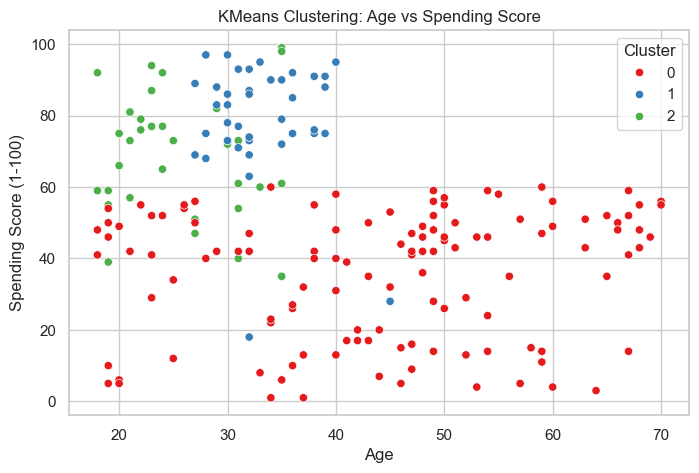

In [74]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Classification report

In [75]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.65      0.75      0.70        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



ROC Curve

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

Probabilitas prediksi untuk kelas 1 (HighSpender)

In [77]:
y_probs = model.predict_proba(X_test)[:, 1]

Hitung nilai ROC

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

Plot ROC Curve

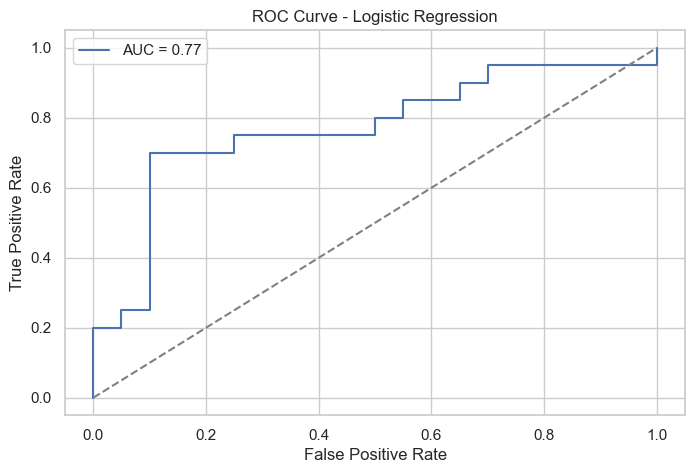

In [79]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis random guess
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

Ngrok

In [80]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyngrok in c:\users\ariel putra a\appdata\local\programs\python\python311\lib\site-packages (7.2.7)




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Konfigurasikan token

In [81]:
!ngrok config add-authtoken 2wqfLVX0nJ00ef4vFu6HJmuzlH7_5ffCa4LuK4gRrGoxopMBN

Authtoken saved to configuration file: C:\Users\ARIEL PUTRA A\AppData\Local/ngrok/ngrok.yml


Install Streamlit

In [82]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Konfigurasi Streamlit untuk Deployment

In [83]:
import streamlit as st
import joblib as joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load model & data ===
model = joblib.load('logistic_model.pkl')  # pastikan file ini ada
df_all = pd.read_csv("data.csv")  # pastikan file ini ada
df_all.columns = df_all.columns.str.strip()  # bersihkan nama kolom
df_all['HighSpender'] = (df_all['Spending Score (1-100)'] >= 50).astype(int)  # buat target

# === Judul Aplikasi ===
st.title("Prediksi Pelanggan High Spender")

# === Input Pengguna ===
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Umur", min_value=10, max_value=100, value=25)
income = st.number_input("Pendapatan Tahunan (k$)", min_value=1, max_value=200, value=50)

# Encode Gender
gender_encoded = 1 if gender.lower() == 'male' else 0

# === Tombol Prediksi ===
if st.button("Prediksi"):
    features = np.array([[gender_encoded, age, income]])
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    # Output Prediksi
    st.subheader("Hasil Prediksi:")
    st.write("💡", "High Spender" if prediction == 1 else "Low Spender")
    st.write("📊 Probabilitas:", f"{round(probability * 100, 2)}%")

    # === Visualisasi ===
    # Tambahkan input user ke data visualisasi
    user_row = pd.DataFrame({
        'Age': [age],
        'Annual Income (k$)': [income],
        'HighSpender': ['Input']
    })

    plot_df = pd.concat([
        df_all[['Age', 'Annual Income (k$)', 'HighSpender']],
        user_row
    ], ignore_index=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(
        data=plot_df,
        x='Age',
        y='Annual Income (k$)',
        hue='HighSpender',
        palette={'Input': 'black', 0: 'blue', 1: 'red'},
        style='HighSpender',
        s=100
    )
    plt.title('Distribusi Pelanggan & Input User')
    plt.legend(title='Kategori')
    st.pyplot(fig)


2025-06-02 16:42:32.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-06-02 16:42:32.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-02 16:42:32.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar